In [1]:
import os
import cv2
import random
import numpy as np
import tensorflow
from zipfile import ZipFile, is_zipfile
from kaggle import KaggleApi

from matplotlib import pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

set constants

In [10]:
PATH_TEST = '../data/external/test'
PATH_TRAIN = '../data/external/train'

IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNEL = 3
MASK_CHANNEL = 1
RANDOM_SEED = 42

In [ ]:
np.random.seed = RANDOM_SEED
random.seed = RANDOM_SEED

In [2]:
def download_challenge_files(challenge_name: str, destination_path: str):
    api = KaggleApi()
    api.authenticate()
    
    api.competition_download_files(challenge_name, path=destination_path)
    
    for file in os.listdir(destination_path):
        file_path = os.path.join(destination_path, file)
        
        if is_zipfile(file_path):
            with ZipFile(file_path, 'r') as zip_ref:
                zip_ref.extractall(destination_path)
            os.remove(file_path)

In [3]:
challenge_name = 'data-science-bowl-2018'
destination_path = '../data/external'
download_challenge_files(challenge_name, destination_path)

In [ ]:
!unzip stage1_train.zip -d /data/external/treinamento/
!unzip stage1_test.zip -d /data/external/teste/

In [6]:
train_ids = next(os.walk(PATH_TRAIN))[1]
test_ids = next(os.walk(PATH_TEST))[1]

In [9]:
len(train_ids), len(test_ids)

(670, 65)

In [13]:
dataset_img = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL), dtype=np.uint8)
dataset_mask = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, MASK_CHANNEL), dtype=np.bool_)

In [14]:
dataset_img.shape, dataset_mask.shape

((670, 256, 256, 3), (670, 256, 256, 1))

In [22]:
for i, filename in enumerate(train_ids):
    path = os.path.join(PATH_TRAIN, filename)

    img = cv2.imread(os.path.join(path, 'images', (filename + '.png')))[:,:,:IMG_CHANNEL]
    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    dataset_img[i] = img

    mask_path = os.path.join(path, 'masks')
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, MASK_CHANNEL), dtype=np.bool_)
    for mask_file in next(os.walk(mask_path))[2]:
        mask_ = cv2.imread(os.path.join(mask_path, mask_file))
        mask_ = cv2.cvtColor(mask_, cv2.COLOR_BGR2GRAY)
        mask_ = np.expand_dims(cv2.resize(mask_, (IMG_HEIGHT, IMG_WIDTH)), axis = -1)
        mask = np.maximum(mask, mask_)
    
    dataset_mask[i] = mask

Text(0.5, 1.0, 'Máscara')

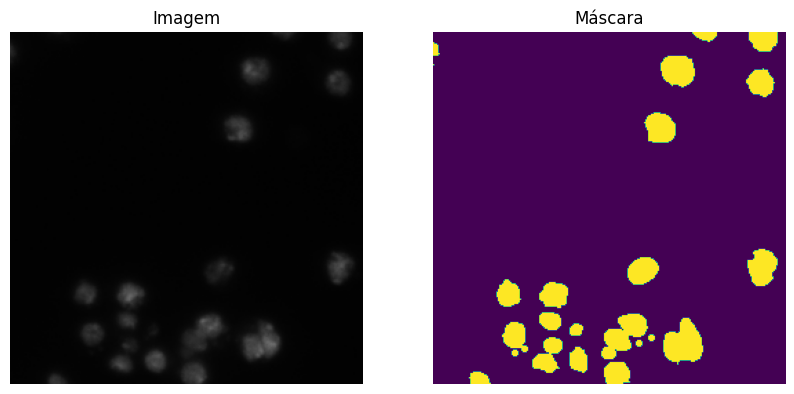

In [25]:
id_img = 0
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(121)
plt.imshow(dataset_img[id_img])
plt.axis('off')
plt.title('Imagem')

fig.add_subplot(122)
plt.imshow(np.squeeze(dataset_mask[id_img]))
plt.axis('off')
plt.title('Máscara')